In [1]:
# загрузка библиотек
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

C:\Users\Katerina\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### <strong> Описание датасета </strong>
* pizza_id: Уникальный идентификатор, присвоенный каждому отдельному виду пиццы, доступному для заказа.
* order_id: Уникальный идентификатор для каждого сделанного заказа, который ссылается на несколько пицц.
* pizza_name_id: Идентификатор, ссылающийся на конкретное название пиццы.
* quantity: количество единиц определенного вида пиццы, заказанных в рамках заказа.
* order_date: Дата размещения заказа.
* order_time: Время размещения заказа.
* unit_price: Стоимость одной единицы конкретного вида пиццы.
* total_price: Совокупная стоимость всех единиц конкретного вида пиццы в заказе.
* pizza_size: Представляет размер пиццы ( маленький, средний, большой).
* pizza_category: Указывает категорию пиццы, такую как вегетарианская, не вегетарианская и т. Д.
* pizza_ingredients: Предоставляет список или описание ингредиентов, используемых в пицце.
* pizza_name: Указывает название конкретного заказанного вида пиццы.

In [2]:
# загрузка датасета
pizza = pd.read_csv('pizza_sales.csv', encoding='1251')
pizza

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
# проверка на наличие дубликатов
pizza[pizza.duplicated()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name


In [4]:
# просмотр информации по датасету, наличие пустых значений, типов данных
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


Ни в одной колонке нет пустых значений, в тех колонках, где указаны цифры, тип данных - float, корректный и необходимый для рассчетов, дубликатов строк нет.
Проведем следующую предобработке:
* Добавим несколько колонок, выделив из даты и времени заказа часы, месяц и день недели.
* Приведем значения в колонке date_order к единому формату.

In [5]:
# приведение колонки order_date к единому формату
pizza['order_date'] = pd.to_datetime(pizza['order_date'], infer_datetime_format=True, format='mixed').dt.strftime('%Y/%m/%d')

C:\Users\Katerina\AppData\Local\Temp\ipykernel_13616\1464653208.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pizza['order_date'] = pd.to_datetime(pizza['order_date'], infer_datetime_format=True, format='mixed').dt.strftime('%Y/%m/%d')


In [6]:
# извлечение номера месяца из даты
pizza['order_month'] = pd.to_datetime(pizza.order_date).dt.month

In [7]:
# Извлечение имени дня недели из даты
pizza['order_day'] =  pd.to_datetime(pizza.order_date).dt.day_name()

In [8]:
# извлечение номера дня недели
pizza['order_day_number'] = pd.to_datetime(pizza['order_date']).dt.day_of_week

In [9]:
# извлечение часа из order_time
pizza['order_hour'] = pd.to_datetime(pizza['order_time']).dt.hour

C:\Users\Katerina\AppData\Local\Temp\ipykernel_13616\121456329.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pizza['order_hour'] = pd.to_datetime(pizza['order_time']).dt.hour


In [10]:
pizza['order_day_of_month'] = pd.to_datetime(pizza['order_date']).dt.day

In [11]:
# проверка результата
pizza.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_month,order_day,order_day_number,order_hour,order_day_of_month
0,1.0,1.0,hawaiian_m,1.0,2015/01/01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,Thursday,3,11,1
1,2.0,2.0,classic_dlx_m,1.0,2015/01/01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,Thursday,3,11,1
2,3.0,2.0,five_cheese_l,1.0,2015/01/01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,Thursday,3,11,1
3,4.0,2.0,ital_supr_l,1.0,2015/01/01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,Thursday,3,11,1
4,5.0,2.0,mexicana_m,1.0,2015/01/01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,Thursday,3,11,1


Посчитаем количество наименований в каждом заказе и общую сумму, а такжесгруппируем таблицу по заказам и по времени

In [12]:
# создание таблицы
orders = pizza.groupby(['order_id', 'order_month',	'order_day_number', 'order_hour']).agg({'quantity': sum, 'total_price': 'sum'}).reset_index()
orders

C:\Users\Katerina\AppData\Local\Temp\ipykernel_13616\729314113.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  orders = pizza.groupby(['order_id', 'order_month',	'order_day_number', 'order_hour']).agg({'quantity': sum, 'total_price': 'sum'}).reset_index()


,order_id,order_month,order_day_number,order_hour,quantity,total_price
0,1.0,1,3,11,1.0,13.25
1,2.0,1,3,11,5.0,92.00
2,3.0,1,3,12,2.0,37.25
3,4.0,1,3,12,1.0,16.50
4,5.0,1,3,12,1.0,16.50
...,...,...,...,...,...,...
21345,21346.0,12,3,20,4.0,62.25
21346,21347.0,12,3,21,4.0,66.50
21347,21348.0,12,3,21,3.0,46.70
21348,21349.0,12,3,22,1.0,20.25


In [13]:
# посмотрим на описательные статистики
orders.describe()

,order_id,order_month,order_day_number,order_hour,quantity,total_price
count,21350.000000,21350.000000,21350.000000,21350.000000,21350.000000,21350.000000
mean,10675.500000,6.423888,2.995363,16.085527,2.321967,38.307262
std,6163.358459,3.437223,1.956103,3.152723,1.825735,30.648197
min,1.000000,1.000000,0.000000,9.000000,1.000000,9.750000
25%,5338.250000,3.000000,1.000000,13.000000,1.000000,17.950000
50%,10675.500000,6.000000,3.000000,16.000000,2.000000,32.500000
75%,16012.750000,9.000000,5.000000,19.000000,3.000000,49.500000
max,21350.000000,12.000000,6.000000,23.000000,28.000000,444.200000


<AxesSubplot:>

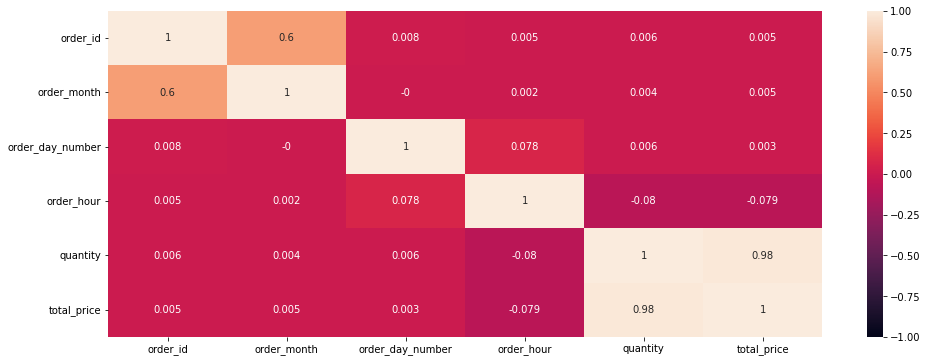

In [14]:
# посмотрим на корреляцию для вновь сформированной таблицы
plt.figure(figsize=(16, 6))
sns.heatmap(orders.corr().round(3), vmax=1, vmin=-1, annot=True)

<AxesSubplot:>

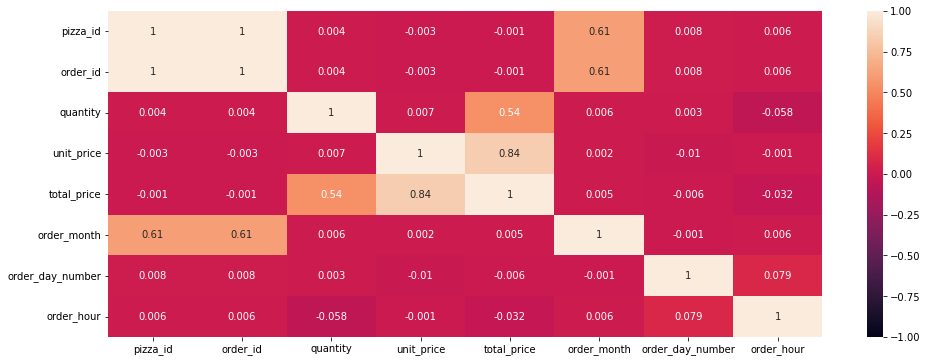

In [15]:
# посмотрим на корреляцию первоначального датафрейма
pizza_corr = pizza[['pizza_id', 'order_id', 'quantity', 'unit_price', 'total_price', 'order_month', 'order_day_number', 'order_hour']]
plt.figure(figsize=(16, 6))
sns.heatmap(pizza_corr.corr().round(3), vmax=1, vmin=-1, annot=True)

В качестве значимой обозначим значение корреляции >= 0.5. Коррелируют следующие показатели:
<p>'total_ price' и 'quantity' - 0.98 для данных, сгруппированных по заказам, что означает, что любые закономерности и распределения для одного показателя будут применимы к другому</p> 
<p>'total_ price' и 'unit_price' - 0.84 и 'total_ price' и 'quantity' - 0.54</p>

### Выбор стиля и параметров графиков

In [16]:
# просмотр стилей
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [17]:
# просмотр параметров matplotlib
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

In [18]:
# выберем стиль и зададим параметры
plt.style.use('ggplot')
params = {
    'font.size': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 15,
    'axes.labelsize': 20,
    'ytick.labelsize' : 15,
    'font.family':  'cursive',   
    'figure.figsize': [6.0, 6.0],
}
plt.rcParams.update(params)

### Количество наименований (qantity) и выручка (total price)

Text(0, 0.5, 'Количество наименований')

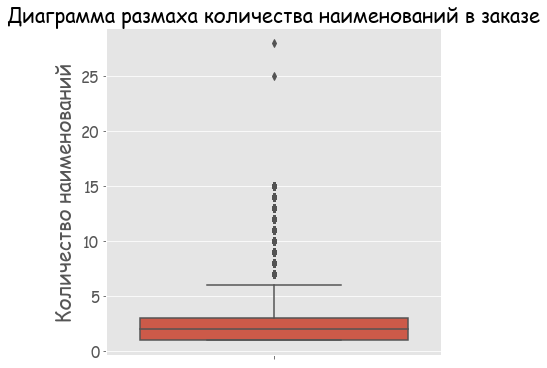

In [19]:
# построим диаграмму распределения
sns.boxplot(data=orders, y='quantity')
plt.title('Диаграмма размаха количества наименований в заказе')
plt.ylabel('Количество наименований')

25 перцентиль: 1 заказ, медиана - 2 заказа, 75 перцентиль - 3 заказа

Text(0.5, 0, 'Количество наименований')

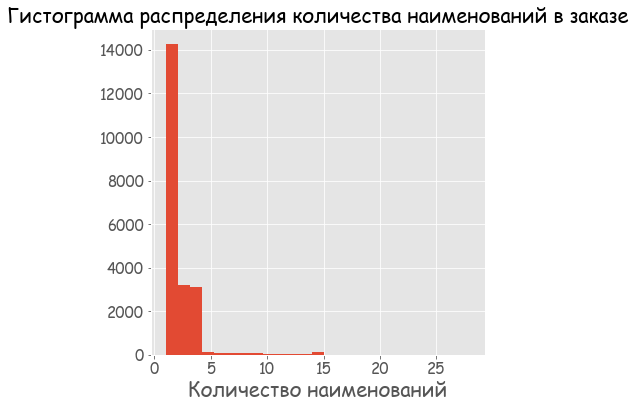

In [20]:
# распределение показателя на гистограмме
orders['quantity'].hist(bins=25)
plt.title('Гистограмма распределения количества наименований в заказе')
plt.xlabel('Количество наименований')

### Стоимость заказа ('total_price')

Text(0, 0.5, 'Стоимость заказа')

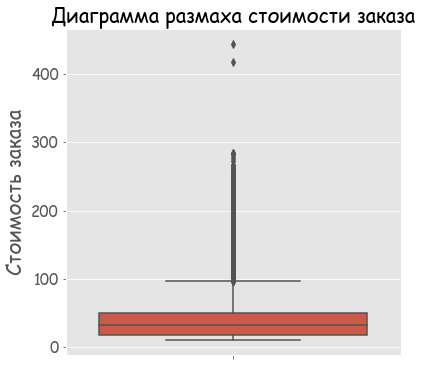

In [21]:
# строим ящик с усами
sns.boxplot(data=orders, y='total_price')
plt.title('Диаграмма размаха стоимости заказа')
plt.ylabel('Стоимость заказа')

Text(0.5, 0, 'Стоимость заказа')

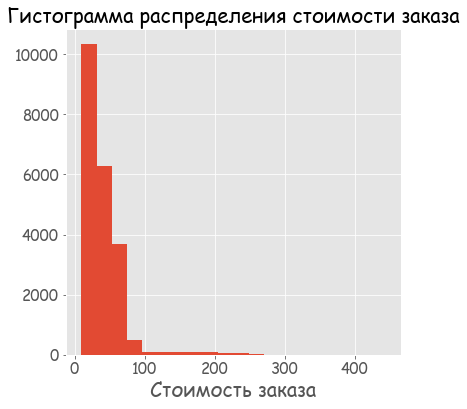

In [22]:
# строим гистограмму
orders['total_price'].hist(bins=20)
plt.title('Гистограмма распределения стоимости заказа')
plt.xlabel('Стоимость заказа')

25 перцентиль - 17.95, медиана -  32.5

### Распределение выручки по временным отрезкам

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Выручка')

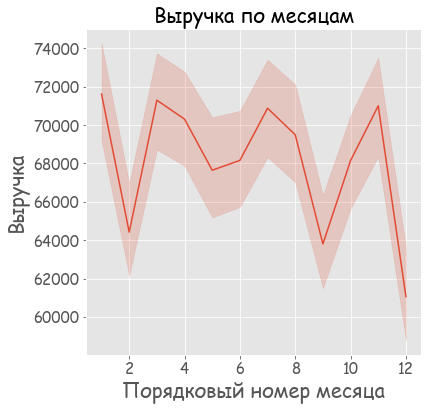

In [23]:
# распределение выручки по месяцам
sns.lineplot(data=orders, x='order_month', y='total_price', estimator=sum)
plt.title('Выручка по месяцам')
plt.xlabel('Порядковый номер месяца')
plt.ylabel('Выручка')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Количество')

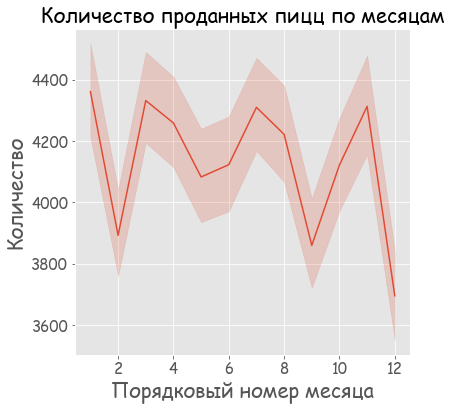

In [24]:
# распределение количества проданных пицц по месяцам
sns.lineplot(data=orders, x='order_month', y='quantity', estimator='sum')
plt.title('Количество проданных пицц по месяцам')
plt.xlabel('Порядковый номер месяца')
plt.ylabel('Количество')

График распределения выручки и количества проданных пицц совпадают
Месяца с максимальными показателями: 1, 3, 7, 11
Месяца с минимальными показателями: 2, 9, 12

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Выручка')

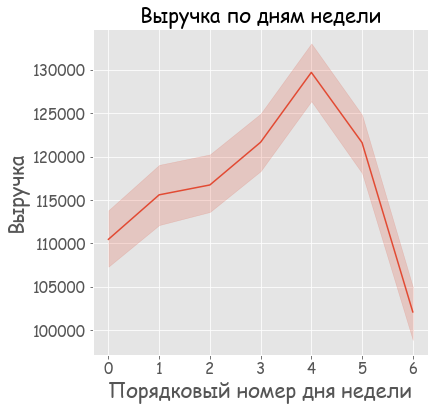

In [25]:
# распределение выручки по дням недели
sns.lineplot(data=orders, x='order_day_number', y='total_price', estimator=sum)
plt.title('Выручка по дням недели')
plt.xlabel('Порядковый номер дня недели')
plt.ylabel('Выручка')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Количество')

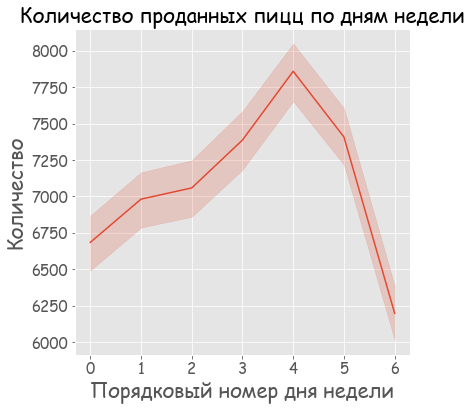

In [26]:
# распределение выручки по месяцам
sns.lineplot(data=orders, x='order_day_number', y='quantity', estimator='sum')
plt.title('Количество проданных пицц по дням недели')
plt.xlabel('Порядковый номер дня недели')
plt.ylabel('Количество')

График распределения выручки и количества проданных пицц совпадают.
Максимальная выручка и количество проданных пицц видны в 4 день - пятница, минимальная - в 6 день, воскресенье, притом графики возрастают плавно с понедельника по пятницу, затем плавно опускаются.

Text(0, 0.5, 'Выручка')

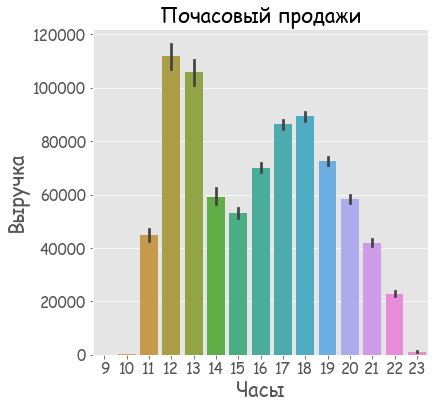

In [27]:
# распределение выручки по часам
sns.barplot(data=orders, x='order_hour', y='total_price', estimator=sum)
plt.title('Почасовый продажи')
plt.xlabel("Часы")
plt.ylabel("Выручка")

Text(0, 0.5, 'Выручка')

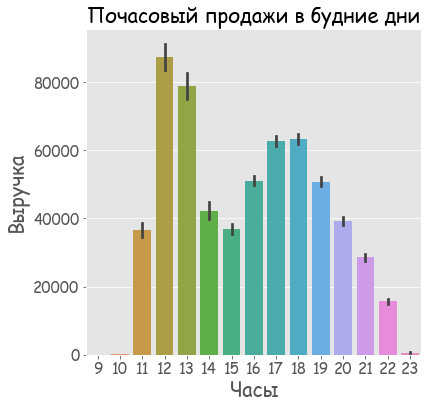

In [28]:
# распределение выручки по часам в будние дни
sns.barplot(data=orders[~orders['order_day_number'].isin([5, 6])], x='order_hour', y='total_price', estimator=sum)
plt.title('Почасовый продажи в будние дни')
plt.xlabel("Часы")
plt.ylabel("Выручка")

Text(0, 0.5, 'Выручка')

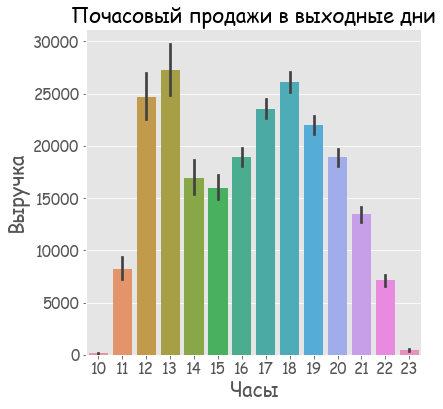

In [29]:
# распределение выручки по часам в выходные дни
sns.barplot(data=orders[orders['order_day_number'].isin([5, 6])], x='order_hour', y='total_price', estimator=sum)
plt.title('Почасовый продажи в выходные дни')
plt.xlabel("Часы")
plt.ylabel("Выручка")

##### Распределение выручки по часам бимодально: 
* первый пик приходится на промежуток с 12 до 14 часов, второй пик с 16 до 23, 
* с максимальным значением в 18 часов.
##### Также хочется отметить небольшую разницу на графиках для выходных и будних дней: </p>
* если для будних дней первая мода (с 12 до 14) намного выше второй (с пиком с 18 до 19), то для выходных дней моды на графике выглядят  ближе друг к другу по значениям; 
* просадка с 14 до 16 для выходных дней меньше, чем для будних, более плавное поступление выручки.

### Распределение выручки и заказов по категориям 

In [30]:
# cоздание и просмотр датафрейма с количеством проданных пицц для каждой категории
categories = pizza.groupby('pizza_category')['quantity'].sum()
categories

pizza_category
Chicken    11050.0
Classic    14888.0
Supreme    11987.0
Veggie     11649.0
Name: quantity, dtype: float64

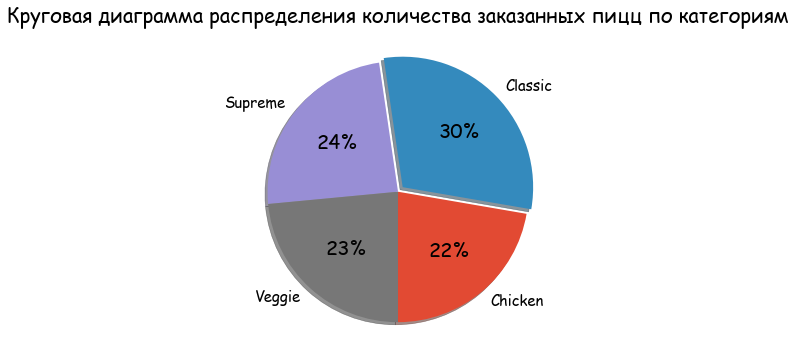

In [31]:
# cтроим круговую диаграмму
plt.figure(figsize=(6, 6))

# color_palette = sns.color_palette("Set2")
categories = pizza.groupby('pizza_category')['quantity'].sum()

plt.pie(data = categories,\
        x=categories.values, labels = categories.index, \
        explode=(0,0.05,0,0), autopct='%1.0f%%', \
        shadow=True, \
        startangle=270)
plt.title("Круговая диаграмма распределения количества заказанных пицц по категориям", size=20)
plt.show()

In [32]:
# cоздание и просмотр датафрейма с выручкой для каждой категории
categories2 = pizza.groupby('pizza_category')['total_price'].sum()
categories2

pizza_category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: total_price, dtype: float64

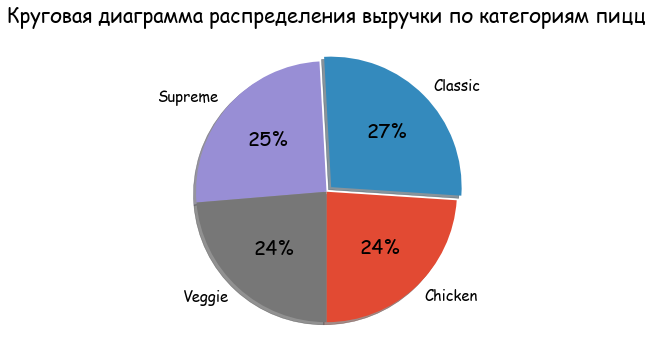

In [33]:
# построение круговой диаграммы
plt.figure(figsize=(6, 6))

plt.pie(data = categories2,\
        x=categories2.values, labels = categories2.index, \
        explode=(0,0.05,0,0), autopct='%1.0f%%', \
        shadow=True, \
        startangle=270)
plt.title("Круговая диаграмма распределения выручки по категориям пицц", size=20)
plt.show()

На круговой диаграмме видим, что максимальное количество проданных пицц и сумма выручки приходится на категорию Classic.
Притом количество проданных пицц и сумма выручки для всех категорий находится в промежутке от 22% до 30 %

#### Самая популярная пицца

In [34]:
# создадим датафрейм сгруппировав наименования по количеству проданных и отсортируем по убыванию выручки
names = pizza.groupby(['pizza_name']).agg({'total_price': 'sum', 'quantity': 'sum'})\
                                    .reset_index()
names_sorted = names.sort_values(by='total_price', ascending=False)

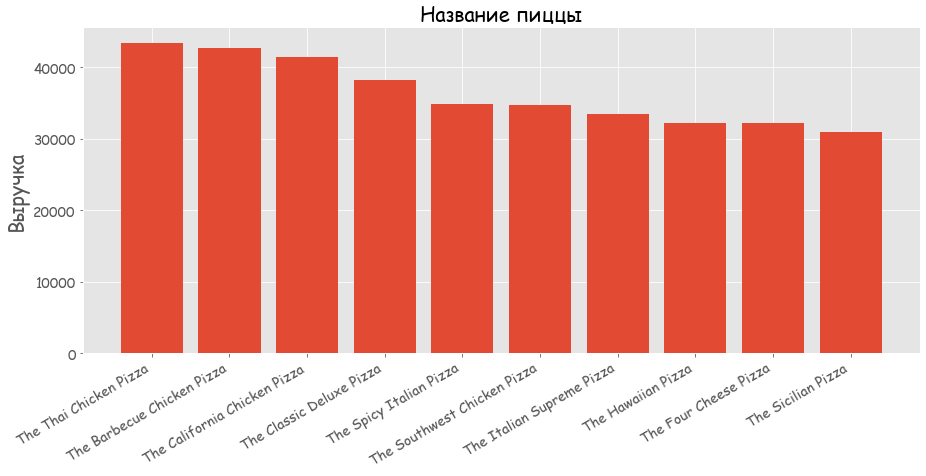

In [35]:
# выручка от 10 видов пицц по убывынию значения
params = {
    'xtick.labelsize': 14,
    'ytick.labelsize' : 14
}
plt.rcParams.update(params)

plt.figure(figsize=(15, 6))
plt.ylabel('Выручка')
plt.title('Название пиццы')

plt.xticks(rotation=30, ha = 'right')

plt.bar(names_sorted.pizza_name.iloc[:10], names_sorted.total_price.iloc[:10])
plt.show()

In [36]:
# топ 5 пицц по количеству проданных
names_sorted.pizza_name.iloc[:5]

30          The Thai Chicken Pizza
0       The Barbecue Chicken Pizza
4     The California Chicken Pizza
7         The Classic Deluxe Pizza
26         The Spicy Italian Pizza
Name: pizza_name, dtype: object

In [37]:
# топ 5 пицц по размеру выручки
names.sort_values(by='quantity', ascending=False)['pizza_name'].iloc[:5]

7       The Classic Deluxe Pizza
0     The Barbecue Chicken Pizza
12            The Hawaiian Pizza
20           The Pepperoni Pizza
30        The Thai Chicken Pizza
Name: pizza_name, dtype: object

### Распределение пицц по размерам

In [38]:
# создадим датафрейм сгруппировав размеры пицц по количеству проданных
sizes = pizza.groupby('pizza_size').agg({'total_price': sum, 'quantity': sum}).reset_index()
sizes

C:\Users\Katerina\AppData\Local\Temp\ipykernel_13616\112758750.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sizes = pizza.groupby('pizza_size').agg({'total_price': sum, 'quantity': sum}).reset_index()
C:\Users\Katerina\AppData\Local\Temp\ipykernel_13616\112758750.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sizes = pizza.groupby('pizza_size').agg({'total_price': sum, 'quantity': sum}).reset_index()


,pizza_size,total_price,quantity
0,L,375318.70,18956.0
1,M,249382.25,15635.0
2,S,178076.50,14403.0
3,XL,14076.00,552.0
4,XXL,1006.60,28.0


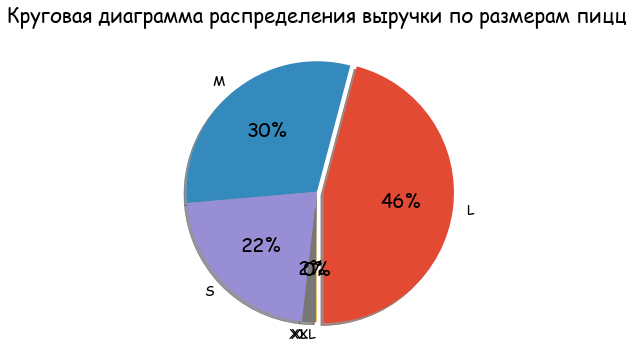

In [39]:
# построим круговую диаграмму распределения выручки по размерам
plt.figure(figsize=(6, 6))

plt.pie(data = sizes,\
        x=sizes.total_price, labels = sizes.pizza_size, \
        explode=(0.05,0,0,0,0), autopct='%1.0f%%', \
        shadow=True, \
        startangle=270)
plt.title("Круговая диаграмма распределения выручки по размерам пицц", size=20)
plt.show()

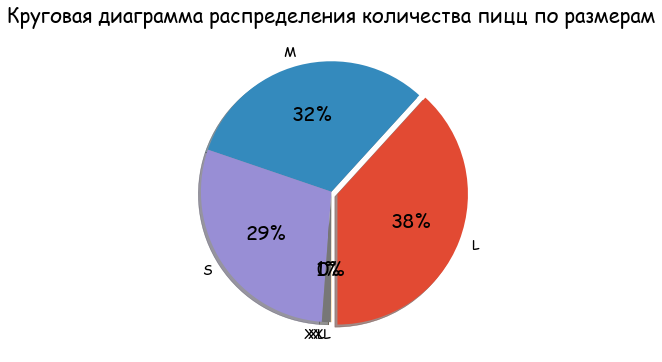

In [40]:
# построим круговую диаграмму распределения размеров по количеству проданных
plt.figure(figsize=(6, 6))

plt.pie(data = sizes,\
        x=sizes.quantity, labels = sizes.pizza_size, \
        explode=(0.05,0,0,0,0), autopct='%1.0f%%', \
        shadow=True, \
        startangle=270)
plt.title("Круговая диаграмма распределения количества пицц по размерам", size=20)
plt.show()

**На размер L** приходится максимальное количество проданных и пицц и выручки, притом при выручке 46%, количество пицц составляет 38% </br>
**На размер M** приходится 30% выручки и 32% пицц</br>
**На размер S**  - 22 выручки и 29% пицц</br>
**На размеры XXL и XL** - меньше 1% по обоим показателям</br>

### **Выводы**
##### <strong>Обзор выручки и количества проданных пицц.</strong>
* <strong>по месяцам:</strong> последовательного роста от месяца к месяцу не наблюдается
* <strong>по дням недели:</strong> максимальная выручка в 4 день - пятница, минимальная - в 6 день, воскресенье, притом график возрастает плавно с понедельника по пятницу, затем плавно опускается.
* <strong>по часам:</strong> распределение бимодально: первый пик приходится на промежуток с 12 до 14 часов, второй пик с 16 до 23, с максимальным значением в 18 часов. Визуально заметна разница на графиках для выходных и будних дней: если для будних дней первая мода (с 12 до 14) намного выше второй (с пиком с 18 до 19), то для выходных дней моды на графике выглядят  ближе друг к другу по значениям; просадка с 14 до 16 для выходных дней меньше, чем для будних, более плавное поступление выручки.
* <strong>по категориям:</strong> сумма выручки и количество проданных пицц для всех категорий находится в промежутке от 22% до 30% с максимальным значением для категории Classic.
* <strong>по размерам пицц:</strong> на размер L приходится максимальное количество проданных и пицц и выручки, притом при выручке 46%, количество пицц составляет 38%; на размер M приходится 30% выручки и 32% пицц; на размер S - 22 выручки и 29% пицц; на размеры XXL и XL - меньше 1% по обоим показателям

<strong>Топ 5 наименований по количеству проданных:</strong>
1.  The Classic Deluxe Pizza
2.  The Barbecue Chicken Pizza
3.  The Hawaiian Pizza
4.  The Pepperoni Pizza
5.  The Thai Chicken Pizza

<strong>Топ 5 наименований по выручке:</strong>
1. The Thai Chicken Pizza
2. The Barbecue Chicken Pizza
3. The California Chicken Pizza
4. The Classic Deluxe Pizza
5. The Spicy Italian Pizza






